In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Import Database
df=pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/Global-Power-Plant-Database/main/database_IND.csv')

In [3]:
# display max columns
pd.set_option('display.max_columns',None)

In [4]:
temp=df.copy()
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df['source'].nunique()

191

In [6]:
df['geolocation_source'].nunique()

3

In [7]:
print(" we have ",df.shape[0],'- Rows and ',df.shape[1],'-Columns')

 we have  907 - Rows and  27 -Columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
df[df['latitude'].isnull()].head(45)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
14,IND,India,ANOOPGARH ST I&II,IND0000012,9.00,NaN,NaN,Hydro,NaN,NaN,NaN,1987.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,IND,India,Abhijeet,WRI1020238,50.00,NaN,NaN,Solar,NaN,NaN,NaN,2015.0,Ener-t International Ltd.,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,IND,India,BAGLIHAR HEP-II,IND0000021,450.00,NaN,NaN,Hydro,NaN,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,55.3220,1750.18510,1812.84025,1848.620450,NaN,Central Electricity Authority,NaN
45,IND,India,BALCO TPP,IND0000025,600.00,NaN,NaN,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,1437.9547,2800.00000,2120.68000,2553.000000,NaN,Central Electricity Authority,NaN
67,IND,India,BCPL Wind Farm,WRI1026675,5.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Bharat Petroleum Corporation Limited,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,IND,India,BELLARY DG,IND0000044,25.20,NaN,NaN,Oil,NaN,NaN,NaN,2000.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,0.00,0.0000,0.00000,0.00000,0.000000,NaN,Central Electricity Authority,NaN
178,IND,India,DIMBE,IND0000102,5.00,NaN,NaN,Hydro,NaN,NaN,NaN,1997.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,IND,India,Davangere Wind Farm,WRI1026100,125.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,IND,India,E.G. CANAL,IND0000110,15.00,NaN,NaN,Hydro,NaN,NaN,NaN,1996.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,IND,India,Essel Mining Wind Farm,WRI1026101,75.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[df['name']=='Abhijeet']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
25,IND,India,Abhijeet,WRI1020238,50.0,NaN,NaN,Solar,NaN,NaN,NaN,2015.0,Ener-t International Ltd.,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [12]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [14]:
#  % of missing data

round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

estimated_generation_gwh    100.00
other_fuel3                 100.00
wepp_id                     100.00
generation_gwh_2013         100.00
generation_gwh_2019         100.00
other_fuel2                  99.89
other_fuel1                  78.17
owner                        62.29
generation_gwh_2014          56.12
generation_gwh_2015          53.47
generation_gwh_2016          52.15
generation_gwh_2017          51.49
generation_gwh_2018          50.61
generation_data_source       50.50
year_of_capacity_data        42.78
commissioning_year           41.90
latitude                      5.07
longitude                     5.07
geolocation_source            2.09
country                       0.00
url                           0.00
country_long                  0.00
primary_fuel                  0.00
capacity_mw                   0.00
gppd_idnr                     0.00
name                          0.00
source                        0.00
dtype: float64

In [15]:
plt.figure(figsize=(15,10))
#sns.heatmap(df.isnull(),annot=True)

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [16]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [17]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [18]:
df['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

In [19]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [20]:
df.drop(['estimated_generation_gwh','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019'], axis=1, inplace= True)

In [21]:
df.shape

(907, 22)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   other_fuel2             1 non-null      object 
 10  commissioning_year      527 non-null    float64
 11  owner                   342 non-null    object 
 12  source                  907 non-null    object 
 13  url                     907 non-null    object 
 14  geolocation_source      888 non-null    ob

In [23]:
df['country'].unique()

array(['IND'], dtype=object)

In [24]:
df['country'].nunique()

1

<Axes: xlabel='country', ylabel='count'>

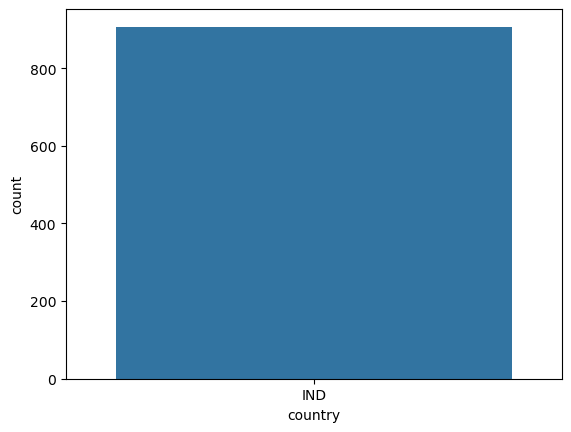

In [25]:
sns.countplot(x='country', data=df)

In [26]:
# This column is irrevelent because providing 1 type of information only, We can drop this
df['country_long'].unique()

array(['India'], dtype=object)

In [27]:
df['country_long'].nunique()

1

<Axes: xlabel='country_long', ylabel='count'>

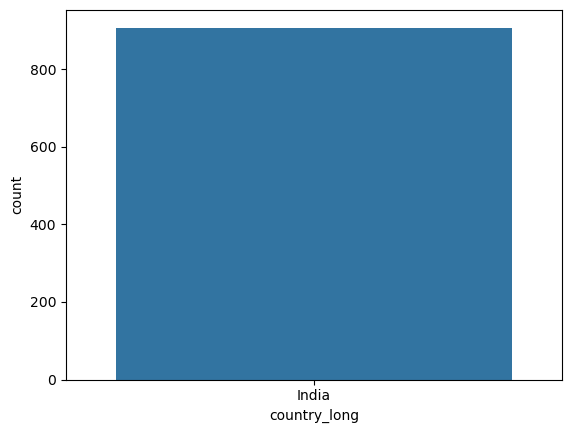

In [28]:
sns.countplot(x='country_long', data=df)

In [29]:
df['geolocation_source'].unique()


array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [30]:
df['country_long'].nunique()

1

<Axes: xlabel='country_long', ylabel='count'>

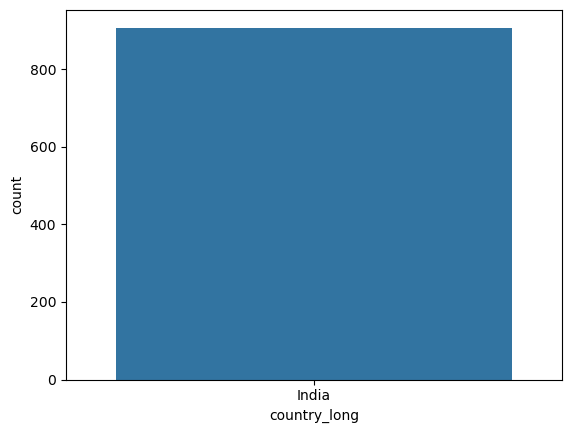

In [31]:
sns.countplot(x='country_long',data=df)

In [32]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [33]:
df['name'].nunique()

907

<Axes: xlabel='name', ylabel='count'>

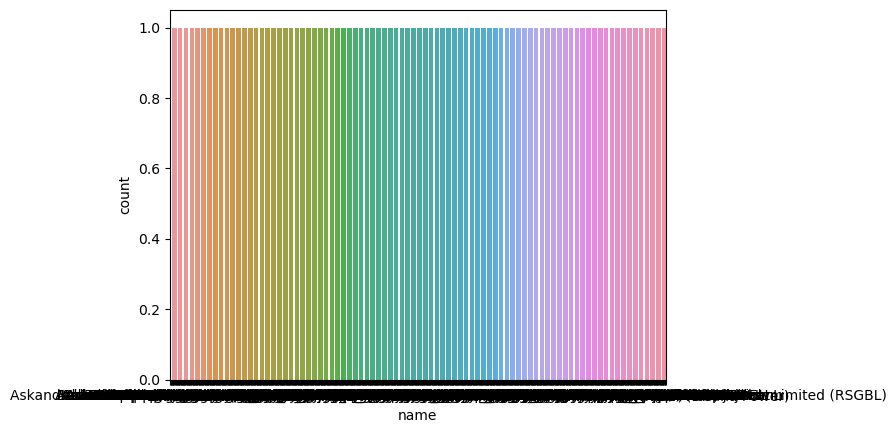

In [34]:
sns.countplot(x='name',data=df)

In [35]:
df['other_fuel1'].nunique(dropna=False)

4

In [36]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [37]:
df['other_fuel2'].nunique()

1

In [38]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [39]:
df['other_fuel2'].value_counts(dropna=False)

NaN    906
Oil      1
Name: other_fuel2, dtype: int64

In [40]:
# Drop this
df.drop(['country','country_long','name','other_fuel1','other_fuel2'   ], axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                861 non-null    float64
 3   longitude               861 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   commissioning_year      527 non-null    float64
 6   owner                   342 non-null    object 
 7   source                  907 non-null    object 
 8   url                     907 non-null    object 
 9   geolocation_source      888 non-null    object 
 10  year_of_capacity_data   519 non-null    float64
 11  generation_gwh_2014     398 non-null    float64
 12  generation_gwh_2015     422 non-null    float64
 13  generation_gwh_2016     434 non-null    float64
 14  generation_gwh_2017     440 non-null    fl

In [42]:
df['gppd_idnr'].nunique()

907

In [43]:
df['gppd_idnr']

0      WRI1020239
1      WRI1019881
2      WRI1026669
3      IND0000001
4      IND0000002
          ...    
902    IND0000513
903    WRI1026222
904    WRI1026776
905    WRI1019901
906    WRI1026761
Name: gppd_idnr, Length: 907, dtype: object

In [44]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [45]:
df['owner'].nunique()

280

In [46]:
df['source'].nunique()

191

In [47]:
df['source'].nunique()

191

In [48]:
df['url'].nunique()

304

In [49]:
df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [50]:
# URL feature is irrevelent for model. we can drop this
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [51]:
df.drop(['gppd_idnr','url'   ], axis=1,inplace=True)
df.shape

(907, 15)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   owner                   342 non-null    object 
 6   source                  907 non-null    object 
 7   geolocation_source      888 non-null    object 
 8   year_of_capacity_data   519 non-null    float64
 9   generation_gwh_2014     398 non-null    float64
 10  generation_gwh_2015     422 non-null    float64
 11  generation_gwh_2016     434 non-null    float64
 12  generation_gwh_2017     440 non-null    float64
 13  generation_gwh_2018     448 non-null    float64
 14  generation_data_source  449 non-null    ob

In [53]:
df.head(15)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.50,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.00,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.20,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.00,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.00,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,250.00,23.7689,68.6447,Coal,2005.0,NaN,Central Electricity Authority,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,60.00,10.4547,77.0078,Hydro,1970.0,NaN,Central Electricity Authority,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150,Central Electricity Authority
7,192.00,32.2258,77.2070,Hydro,2010.0,NaN,Central Electricity Authority,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850,Central Electricity Authority
8,290.00,16.3300,75.8863,Hydro,2004.0,NaN,Central Electricity Authority,WRI,2019.0,480.594950,144.4342,402.029750,439.372100,406.377900,Central Electricity Authority
9,210.00,23.1642,81.6373,Coal,2008.0,NaN,Central Electricity Authority,WRI,2019.0,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,Central Electricity Authority


In [54]:
df['owner'].nunique()

280

In [55]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [56]:
df['owner'].value_counts(dropna=False)

NaN                                                            565
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 281, dtype: int64

In [57]:
df['source'].nunique()

191

In [58]:
df['geolocation_source'].value_counts(dropna=False)

WRI                                     765
Industry About                          119
NaN                                      19
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [59]:
df['generation_data_source'].value_counts(dropna=False)

NaN                              458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [60]:
df.drop(['owner','source','generation_data_source','geolocation_source'], axis=1,inplace=True)

In [61]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            907 non-null    float64
 1   latitude               861 non-null    float64
 2   longitude              861 non-null    float64
 3   primary_fuel           907 non-null    object 
 4   commissioning_year     527 non-null    float64
 5   year_of_capacity_data  519 non-null    float64
 6   generation_gwh_2014    398 non-null    float64
 7   generation_gwh_2015    422 non-null    float64
 8   generation_gwh_2016    434 non-null    float64
 9   generation_gwh_2017    440 non-null    float64
 10  generation_gwh_2018    448 non-null    float64
dtypes: float64(10), object(1)
memory usage: 78.1+ KB


In [63]:
df.isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [64]:
#% of missing data

round((df.isnull().sum()/df.shape[0])*100,2)

capacity_mw               0.00
latitude                  5.07
longitude                 5.07
primary_fuel              0.00
commissioning_year       41.90
year_of_capacity_data    42.78
generation_gwh_2014      56.12
generation_gwh_2015      53.47
generation_gwh_2016      52.15
generation_gwh_2017      51.49
generation_gwh_2018      50.61
dtype: float64

<Axes: xlabel='primary_fuel', ylabel='count'>

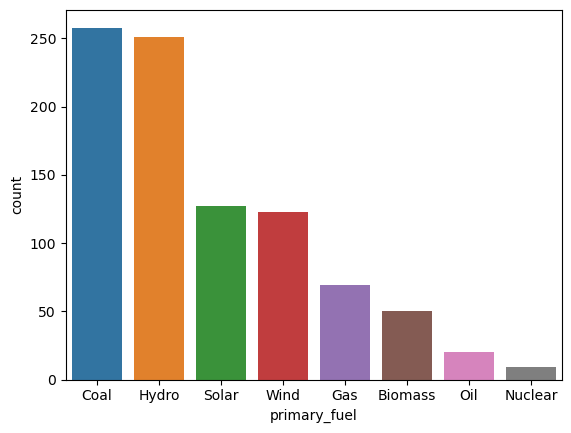

In [65]:
sns.countplot(x='primary_fuel', data=df, order=df['primary_fuel'].value_counts().index)

In [66]:
df['primary_fuel'].value_counts(normalize=True,dropna=False)

Coal       0.284454
Hydro      0.276736
Solar      0.140022
Wind       0.135612
Gas        0.076075
Biomass    0.055127
Oil        0.022051
Nuclear    0.009923
Name: primary_fuel, dtype: float64

In [67]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<Axes: xlabel='capacity_mw', ylabel='Density'>

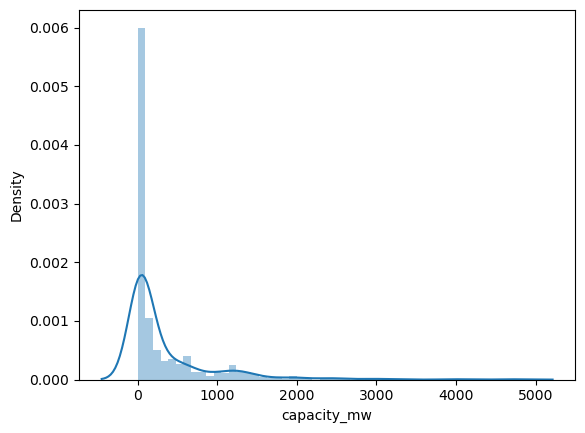

In [68]:
#This is imbalanced data
sns.distplot(df['capacity_mw'])

In [69]:
df['capacity_mw'].describe().T

count     907.000000
mean      326.223755
std       590.085456
min         0.000000
25%        16.725000
50%        59.200000
75%       385.250000
max      4760.000000
Name: capacity_mw, dtype: float64

<Axes: xlabel='commissioning_year', ylabel='count'>

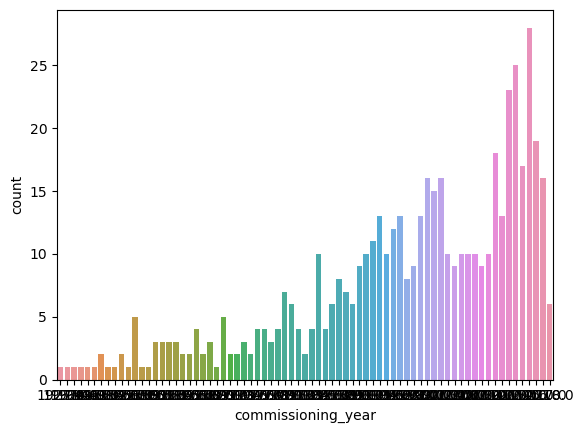

In [70]:
# This is not normal distributed
sns.countplot(x='commissioning_year',data=df)

In [71]:
df['commissioning_year'].value_counts(dropna=False)

NaN       380
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1946.0      1
1956.0      1
1937.0      1
1949.0      1
1953.0      1
Name: commissioning_year, Length: 74, dtype: int64

In [72]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='year_of_capacity_data', ylabel='Density'>

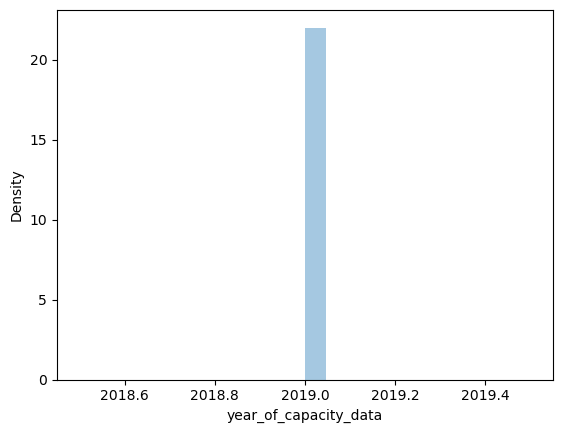

In [73]:
sns.distplot(df['year_of_capacity_data'])

In [74]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [75]:
df['year_of_capacity_data'].value_counts(dropna=False)

2019.0    519
NaN       388
Name: year_of_capacity_data, dtype: int64

In [76]:
df.drop(['year_of_capacity_data'],axis=1,inplace=True)
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='generation_gwh_2014', ylabel='Density'>

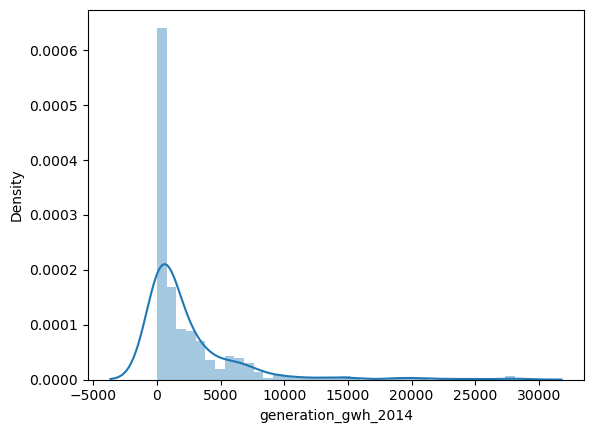

In [77]:
sns.distplot(df['generation_gwh_2014'])

<Axes: xlabel='generation_gwh_2015', ylabel='Density'>

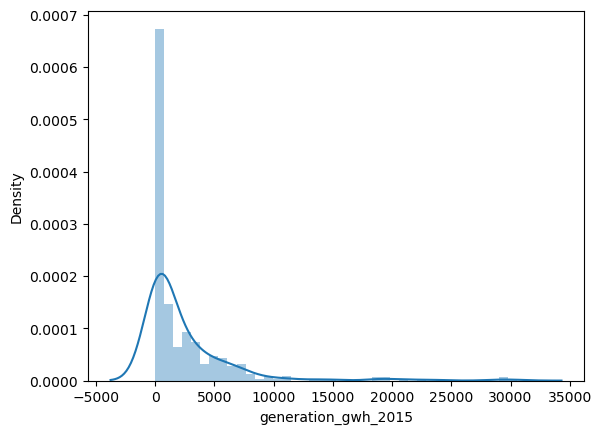

In [78]:
sns.distplot(df['generation_gwh_2015'])

<Axes: xlabel='generation_gwh_2016', ylabel='Density'>

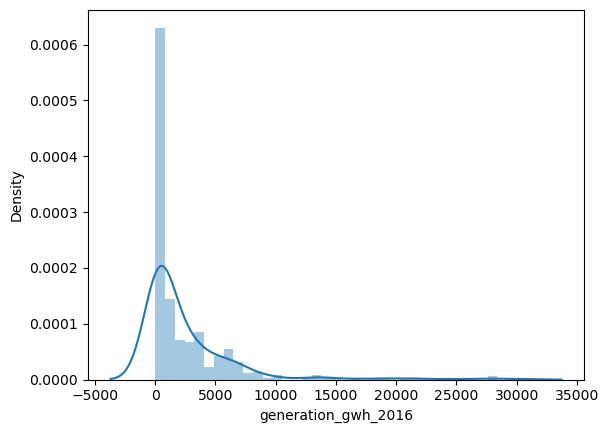

In [79]:
sns.distplot(df['generation_gwh_2016'])

<Axes: xlabel='generation_gwh_2017', ylabel='Density'>

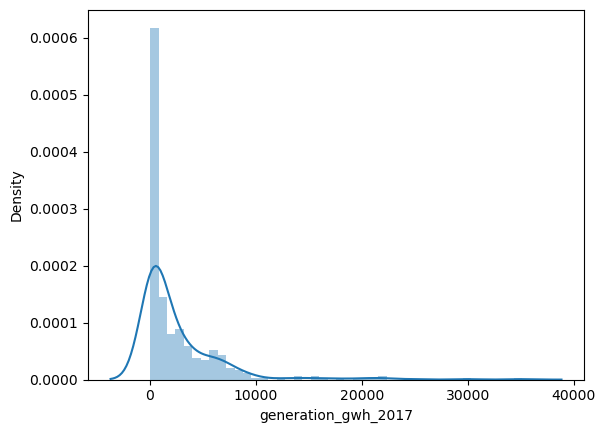

In [80]:
sns.distplot(df['generation_gwh_2017'])

<Axes: xlabel='generation_gwh_2018', ylabel='Density'>

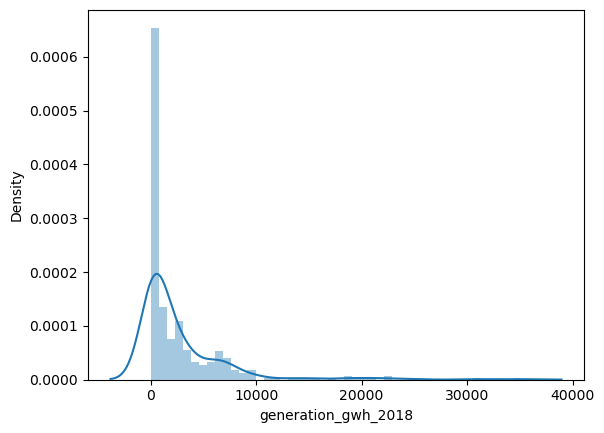

In [81]:
sns.distplot(df['generation_gwh_2018'])

In [82]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='primary_fuel', ylabel='count'>

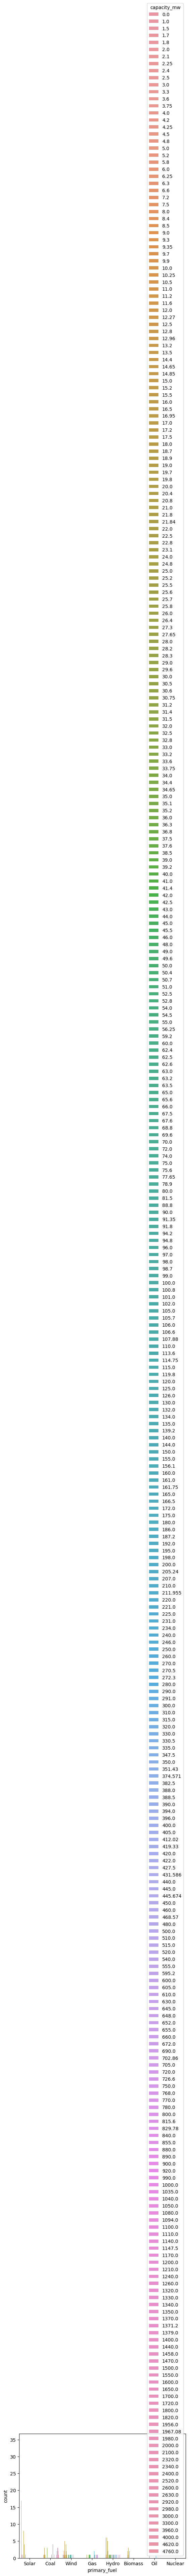

In [83]:
sns.countplot(x = 'primary_fuel',hue = 'capacity_mw',data=df)

In [84]:
visual=df.groupby('primary_fuel')['capacity_mw'].mean().reset_index()
visual

,primary_fuel,capacity_mw
0,Biomass,20.065200
1,Coal,797.826434
2,Gas,364.818928
3,Hydro,185.026972
4,Nuclear,975.555556
5,Oil,88.942000
6,Solar,21.712598
7,Wind,33.429675


In [85]:
df['primary_fuel'].value_counts(normalize=True,dropna=False)

Coal       0.284454
Hydro      0.276736
Solar      0.140022
Wind       0.135612
Gas        0.076075
Biomass    0.055127
Oil        0.022051
Nuclear    0.009923
Name: primary_fuel, dtype: float64

In [86]:
# Capacity_mw  by primary_fuel
visual

,primary_fuel,capacity_mw
0,Biomass,20.065200
1,Coal,797.826434
2,Gas,364.818928
3,Hydro,185.026972
4,Nuclear,975.555556
5,Oil,88.942000
6,Solar,21.712598
7,Wind,33.429675


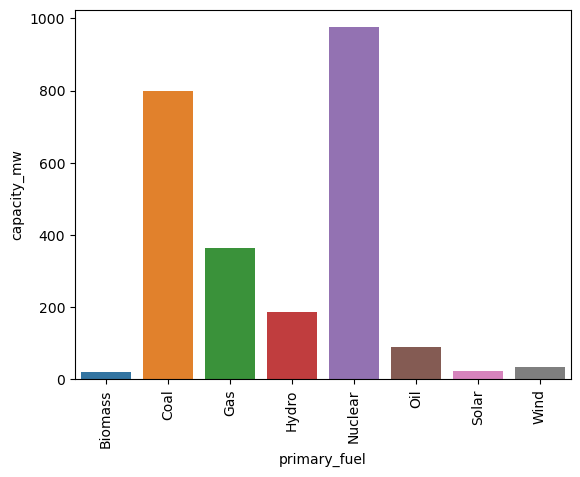

In [87]:
sns.barplot(x='primary_fuel', y='capacity_mw', data=visual)
plt.xticks(rotation=90)
plt.show()

In [88]:
visual.sort_values('capacity_mw',ascending=False)

,primary_fuel,capacity_mw
4,Nuclear,975.555556
1,Coal,797.826434
2,Gas,364.818928
3,Hydro,185.026972
5,Oil,88.942000
7,Wind,33.429675
6,Solar,21.712598
0,Biomass,20.065200


In [89]:
df.groupby('primary_fuel')['commissioning_year'].count()

primary_fuel
Biomass      0
Coal       189
Gas         59
Hydro      251
Nuclear      8
Oil         12
Solar        8
Wind         0
Name: commissioning_year, dtype: int64

In [90]:
df['commissioning_year'].nunique()

73

In [91]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [92]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [93]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


<Axes: xlabel='generation_gwh_2014', ylabel='capacity_mw'>

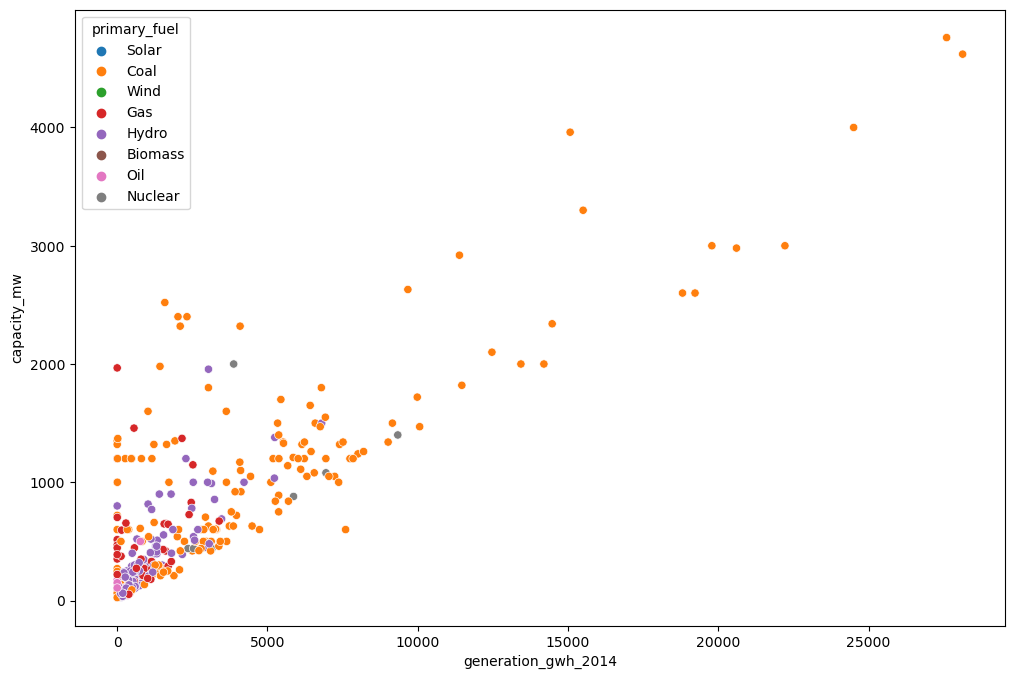

In [94]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel', data=df)

In [95]:
df.groupby('primary_fuel')['generation_gwh_2014'].median()

primary_fuel
Biomass            NaN
Coal       3193.101000
Gas         559.010000
Hydro       386.005275
Nuclear    3875.323150
Oil           0.000000
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

<Axes: xlabel='generation_gwh_2015', ylabel='capacity_mw'>

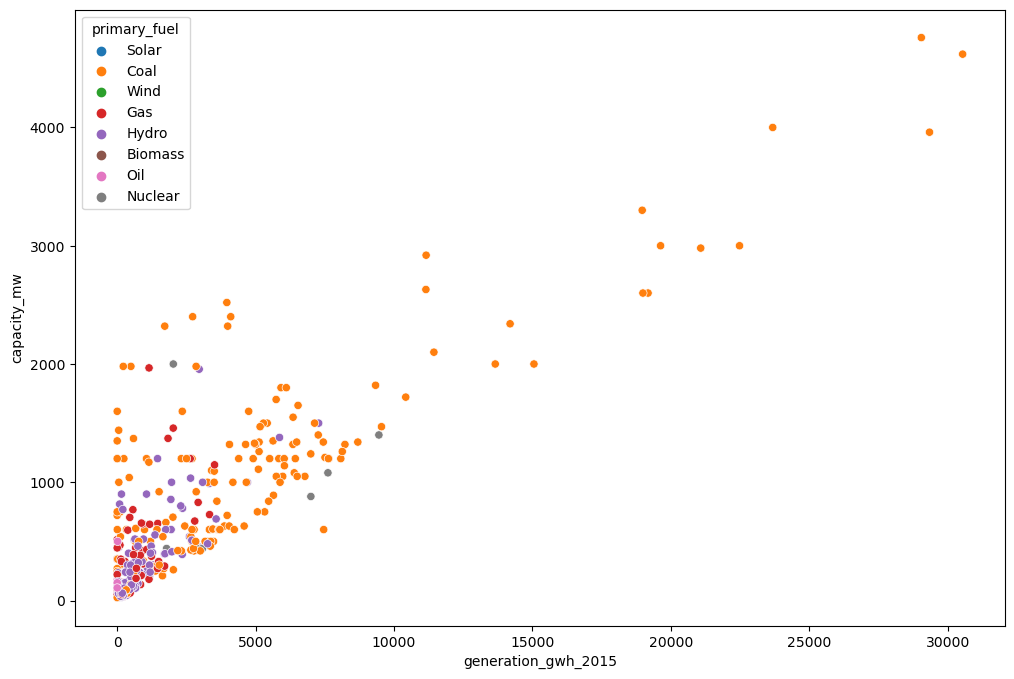

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',hue='primary_fuel', data=df)

In [97]:
df.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

In [98]:
df.groupby('primary_fuel')['generation_gwh_2015']

In [99]:
df[df['primary_fuel']=='Biomass']

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
19,10.00,18.0845,76.1851,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
20,17.00,19.5867,74.7061,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
21,24.00,16.7708,74.9191,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
40,28.00,16.2804,75.2250,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
70,22.80,16.6505,74.8209,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
71,15.00,16.2774,74.7111,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
80,10.00,21.0813,79.7708,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
94,10.00,25.2267,74.6216,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
152,24.00,16.5471,77.0825,Biomass,NaN,NaN,NaN,NaN,NaN,NaN
164,30.00,18.4271,74.6338,Biomass,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='generation_gwh_2016', ylabel='capacity_mw'>

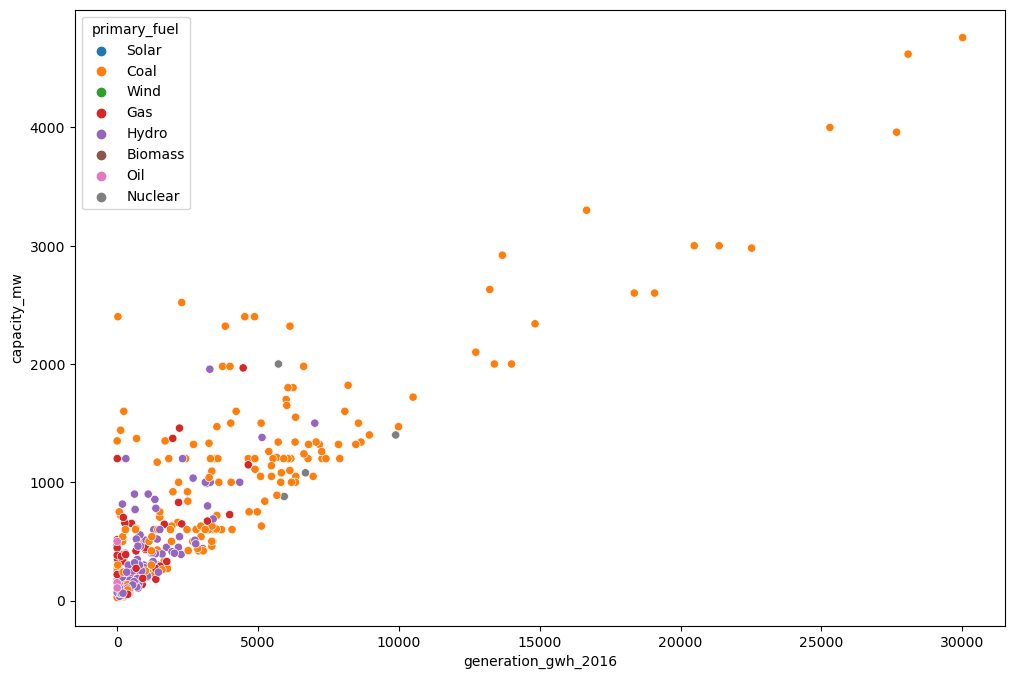

In [100]:
#Biomass , Solar , Wind generated gwh not available for 2014,2015,2016,2017,2018 year
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel', data=df)

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

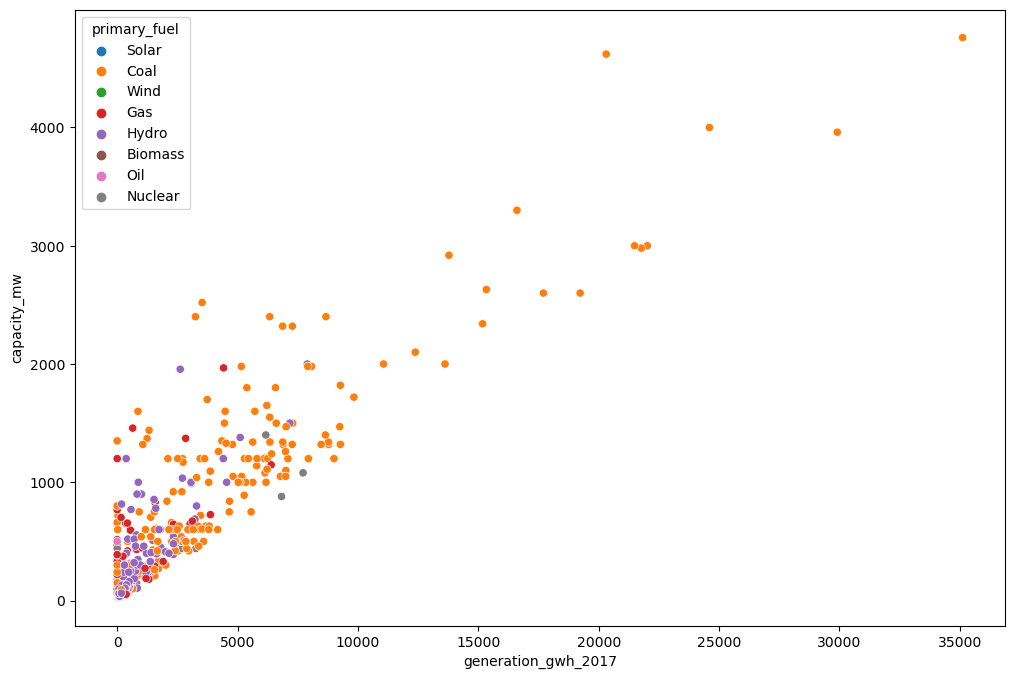

In [101]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel', data=df)

<Axes: xlabel='generation_gwh_2018', ylabel='capacity_mw'>

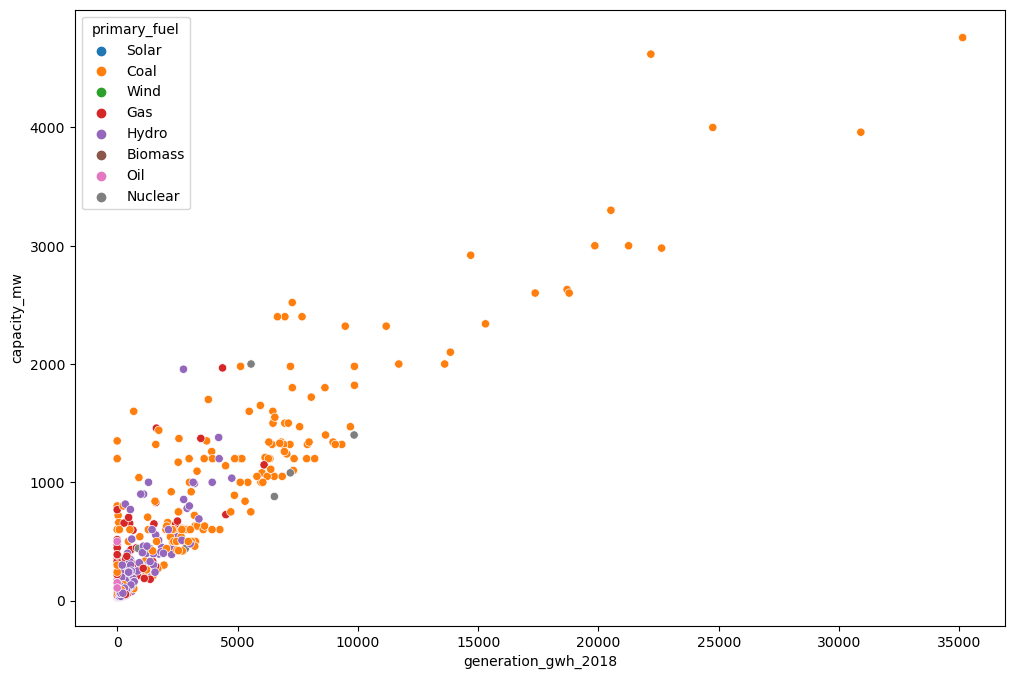

In [102]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',hue='primary_fuel', data=df)

<Axes: xlabel='capacity_mw', ylabel='commissioning_year'>

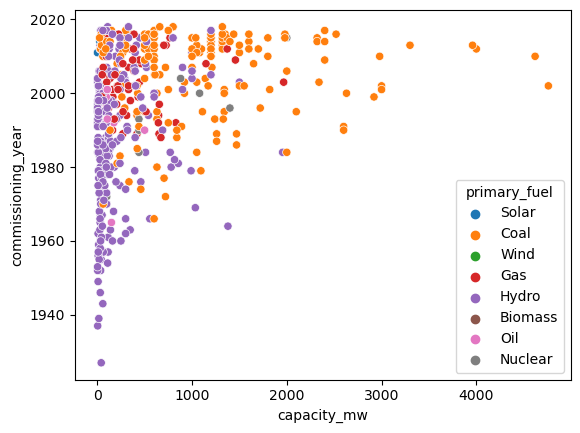

In [103]:
sns.scatterplot(x='capacity_mw',y='commissioning_year',hue='primary_fuel', data=df)

In [104]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


<Axes: >

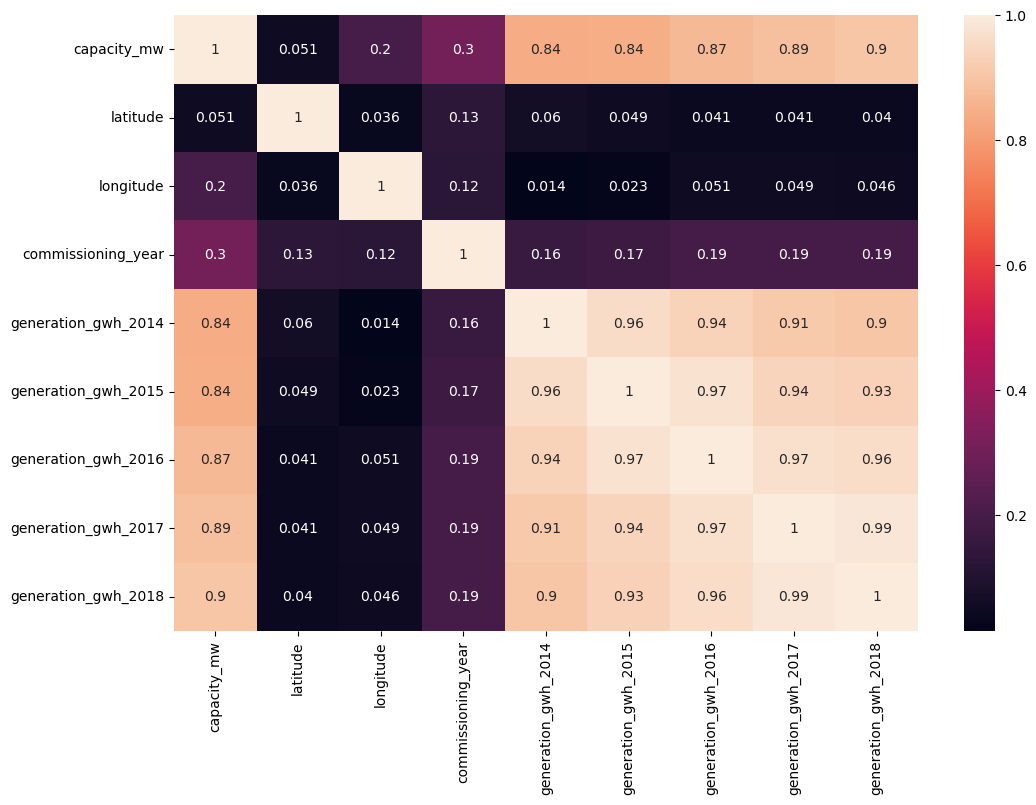

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Figure size 1200x800 with 0 Axes>

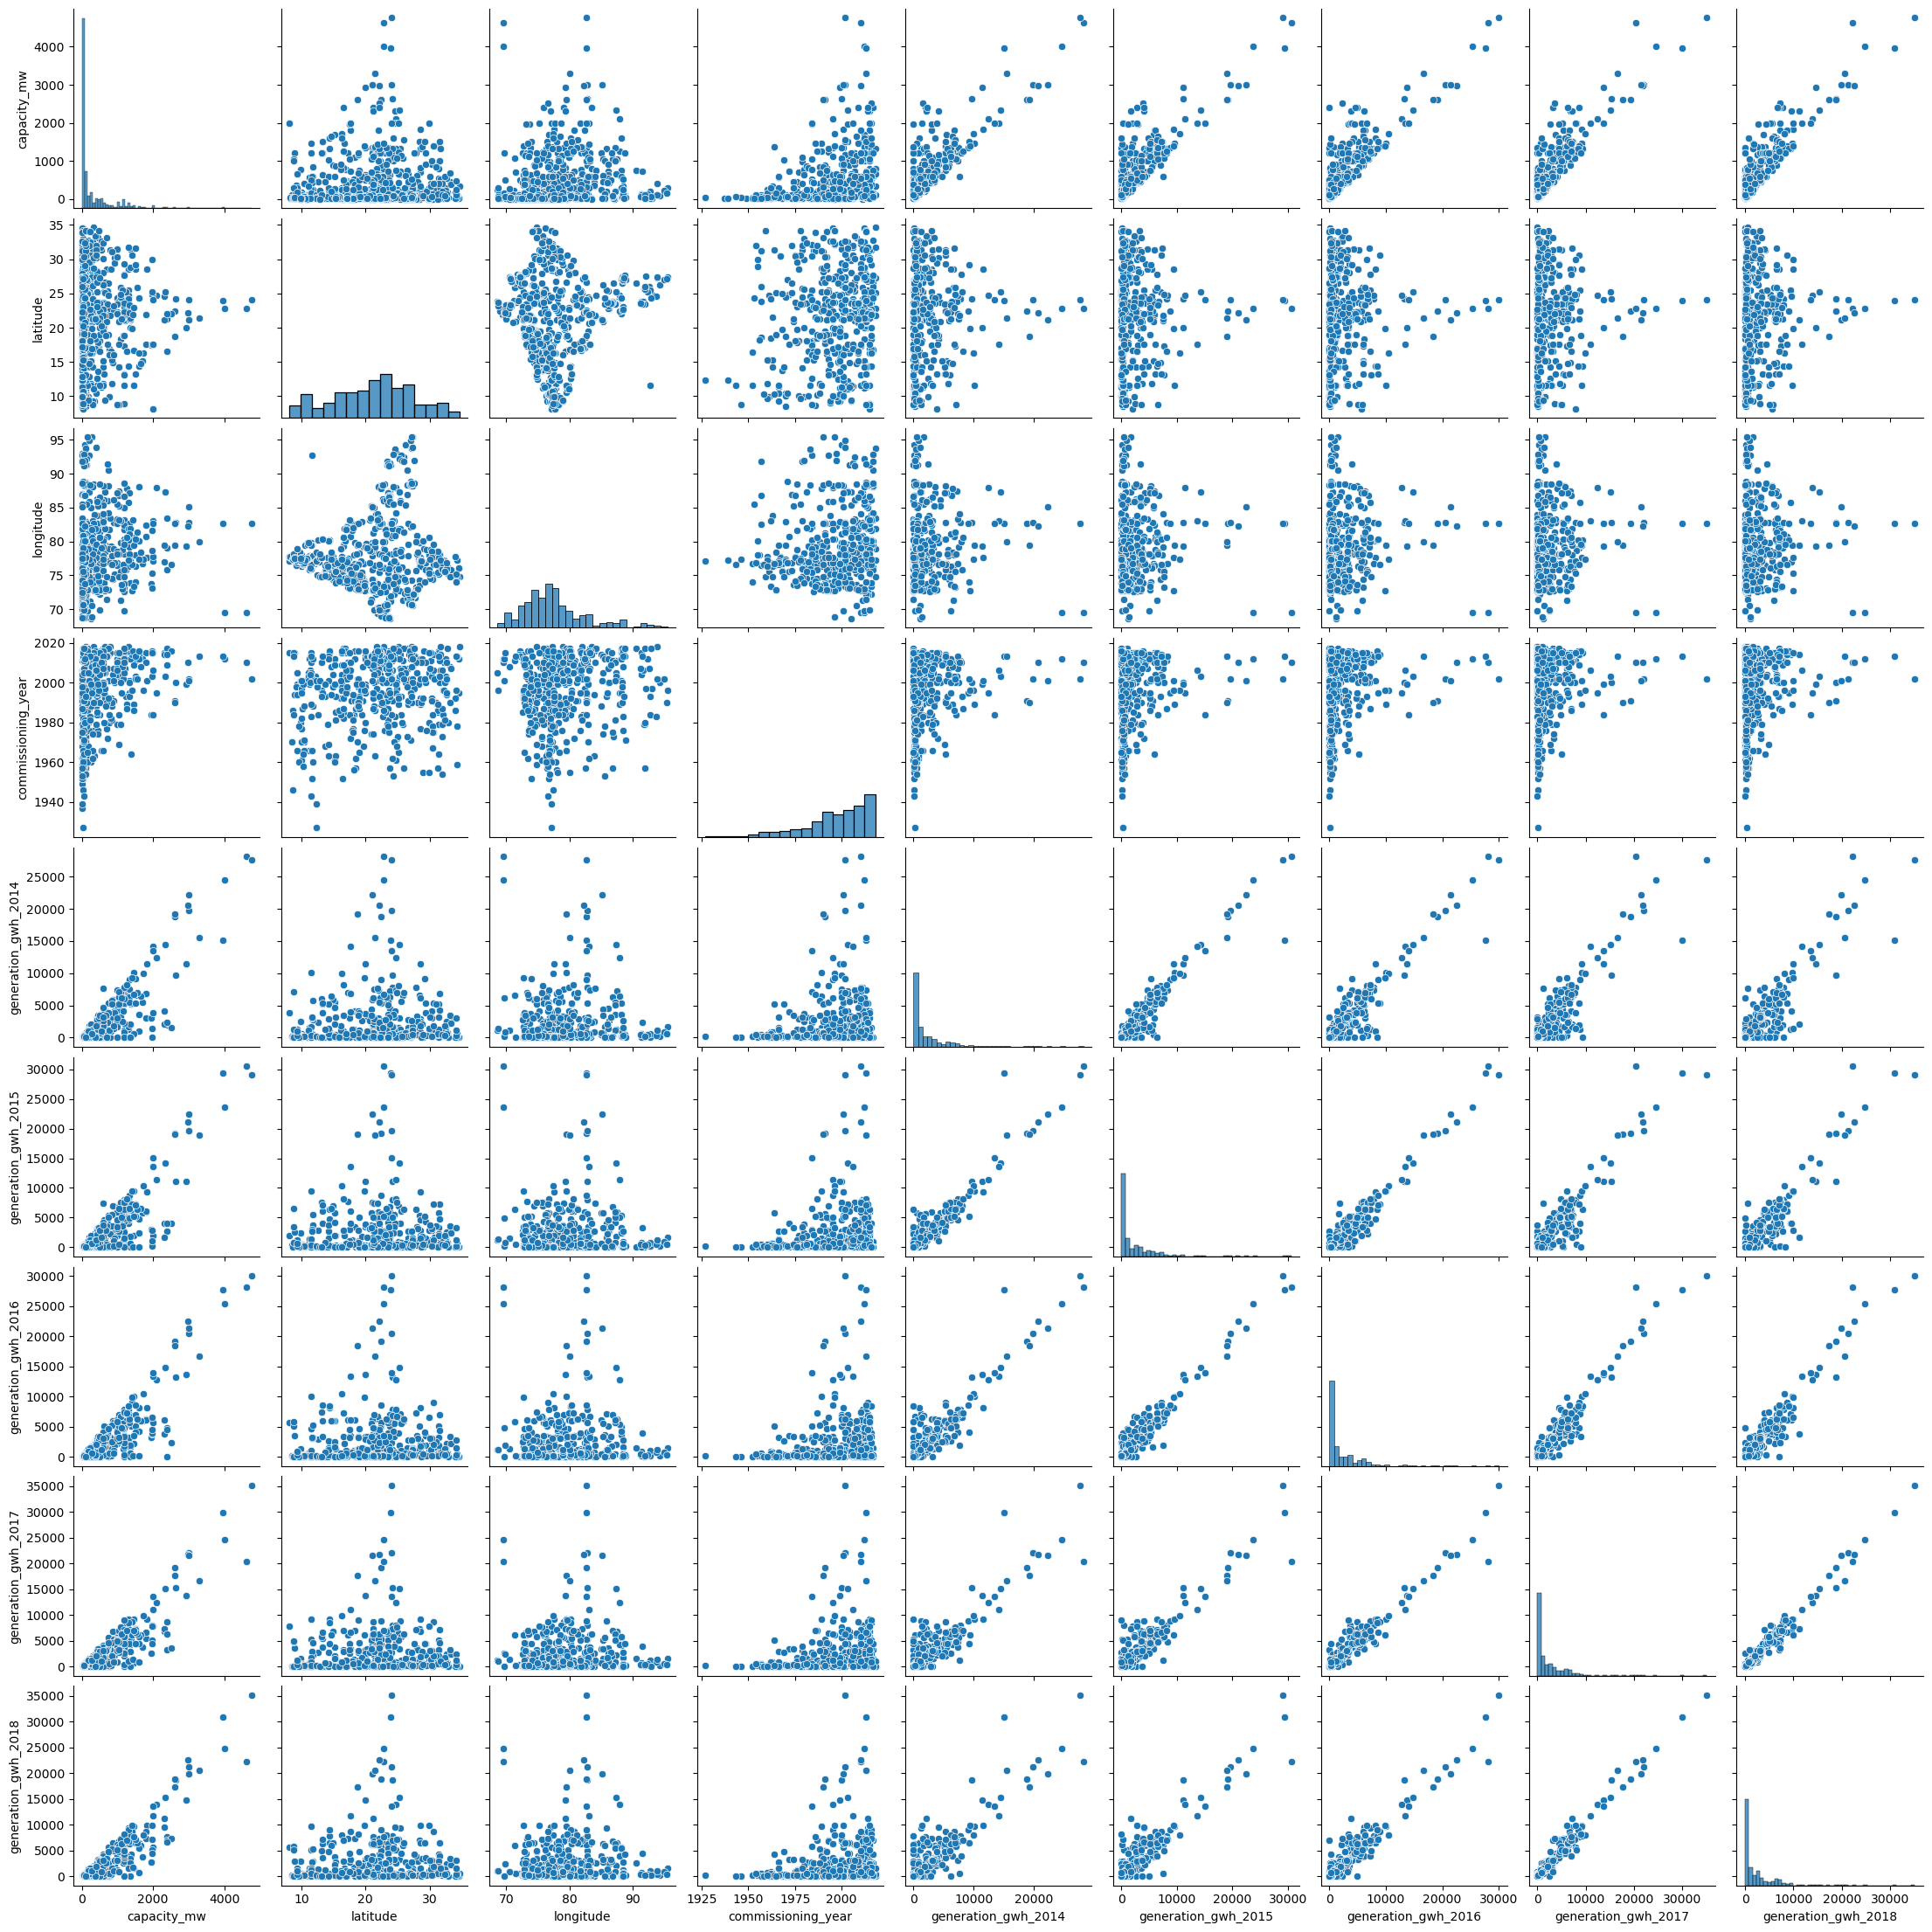

In [106]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

In [107]:
df.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [108]:
df.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Biomass            NaN
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Solar              NaN
Wind               NaN
Name: generation_gwh_2015, dtype: float64

In [109]:
df.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Biomass            NaN
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Solar              NaN
Wind               NaN
Name: generation_gwh_2016, dtype: float64

In [110]:
df.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Biomass            NaN
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Solar              NaN
Wind               NaN
Name: generation_gwh_2017, dtype: float64

In [111]:
df.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Biomass            NaN
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Solar              NaN
Wind               NaN
Name: generation_gwh_2018, dtype: float64

In [112]:
the_mean = df.groupby('primary_fuel').mean()
the_mean

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,,,,,
Biomass,20.065200,17.460458,75.679052,NaN,NaN,NaN,NaN,NaN,NaN
Coal,797.826434,21.657714,79.431460,2006.021164,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
Gas,364.818928,20.050144,78.408238,2002.830508,756.601441,840.159648,826.305503,881.216187,846.658418
Hydro,185.026972,22.258483,78.846256,1988.709163,780.429852,709.991238,699.318079,693.884741,737.636455
Nuclear,975.555556,18.081478,76.124056,1994.250000,4867.556164,4234.875000,4272.608750,4323.415000,4277.031250
Oil,88.942000,17.311847,74.833806,1994.583333,130.881366,21.710086,4.796871,0.167471,0.295215
Solar,21.712598,24.095380,74.352328,2013.375000,NaN,NaN,NaN,NaN,NaN
Wind,33.429675,17.857224,74.181553,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='longitude', ylabel='latitude'>

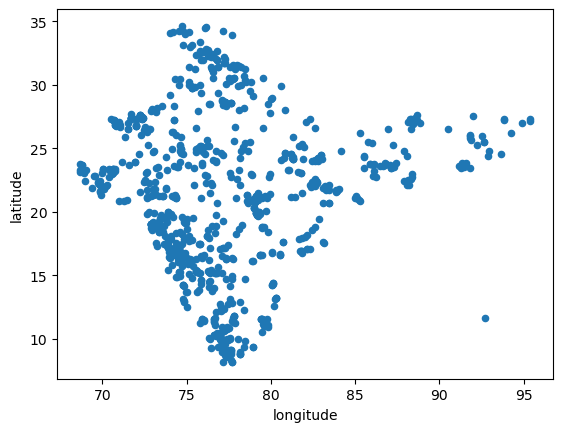

In [113]:
df.plot(x="longitude", y="latitude", kind="scatter",colormap="YlOrRd")

In [114]:
visual

,primary_fuel,capacity_mw
0,Biomass,20.065200
1,Coal,797.826434
2,Gas,364.818928
3,Hydro,185.026972
4,Nuclear,975.555556
5,Oil,88.942000
6,Solar,21.712598
7,Wind,33.429675


In [115]:
data=temp[['longitude','latitude','name']].copy()
data.dropna(inplace=True)
data.isnull().sum()

longitude    0
latitude     0
name         0
dtype: int64

In [116]:
! pip install folium
import folium

Defaulting to user installation because normal site-packages is not writeable


In [117]:
# or the map, the first step is to create a map of the location I want. Using the location parameter, I pass in the mean of the latitude and longitude coordinates I have to centre the map there

map= folium.Map(location=[data['latitude'].mean(),data['longitude'].mean()],zoom_start=5,control_scale=True)

In [118]:
map

In [119]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [120]:
the_mean

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,,,,,
Biomass,20.065200,17.460458,75.679052,NaN,NaN,NaN,NaN,NaN,NaN
Coal,797.826434,21.657714,79.431460,2006.021164,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
Gas,364.818928,20.050144,78.408238,2002.830508,756.601441,840.159648,826.305503,881.216187,846.658418
Hydro,185.026972,22.258483,78.846256,1988.709163,780.429852,709.991238,699.318079,693.884741,737.636455
Nuclear,975.555556,18.081478,76.124056,1994.250000,4867.556164,4234.875000,4272.608750,4323.415000,4277.031250
Oil,88.942000,17.311847,74.833806,1994.583333,130.881366,21.710086,4.796871,0.167471,0.295215
Solar,21.712598,24.095380,74.352328,2013.375000,NaN,NaN,NaN,NaN,NaN
Wind,33.429675,17.857224,74.181553,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df['latitude'].mode()

0    19.0004
1    24.1917
Name: latitude, dtype: float64

In [123]:
df['longitude'].mode()

0    71.6917
Name: longitude, dtype: float64

In [124]:
#As we are not able to find geo location relation with any other column, fill null values by mode

df[['latitude','longitude']].mode()

,latitude,longitude
0,19.0004,71.6917
1,24.1917,NaN


In [125]:
df['commissioning_year'].mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [126]:
# Lets replace latitude by 19.0004 and longitude by 71.6917
df['latitude'].fillna(df['latitude'].mode()[0], inplace=True)
df['longitude'].fillna(df['longitude'].mode()[0], inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

In [127]:
df['latitude'].isnull().sum()

0

In [128]:
df['longitude'].isnull().sum()

0

In [129]:
df['commissioning_year'].isnull().sum()

0

<Axes: >

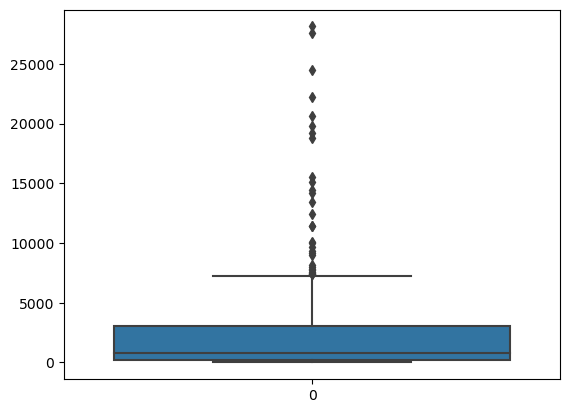

In [130]:
#Fill Missing Values
sns.boxplot(df['generation_gwh_2014'])

In [131]:
# Calculate median power generated in year 2014 as per fuel type

df.groupby('primary_fuel').mean()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,,,,,
Biomass,20.065200,17.460458,75.679052,2015.000000,NaN,NaN,NaN,NaN,NaN
Coal,797.826434,21.606216,79.281465,2008.422481,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
Gas,364.818928,20.034930,78.310897,2004.594203,756.601441,840.159648,826.305503,881.216187,846.658418
Hydro,185.026972,22.024835,78.333180,1988.709163,780.429852,709.991238,699.318079,693.884741,737.636455
Nuclear,975.555556,18.081478,76.124056,1996.555556,4867.556164,4234.875000,4272.608750,4323.415000,4277.031250
Oil,88.942000,17.565130,74.362490,2002.750000,130.881366,21.710086,4.796871,0.167471,0.295215
Solar,21.712598,23.934908,74.268528,2014.897638,NaN,NaN,NaN,NaN,NaN
Wind,33.429675,17.996636,73.877912,2015.000000,NaN,NaN,NaN,NaN,NaN


In [132]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2015.0,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2015.0,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [133]:
X= df.drop('primary_fuel', axis=1)
Y= df['primary_fuel']

In [134]:
X.shape , Y.shape

((907, 9), (907,))

In [135]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
X['primary_fuel']=le.fit_transform(Y)

<Axes: >

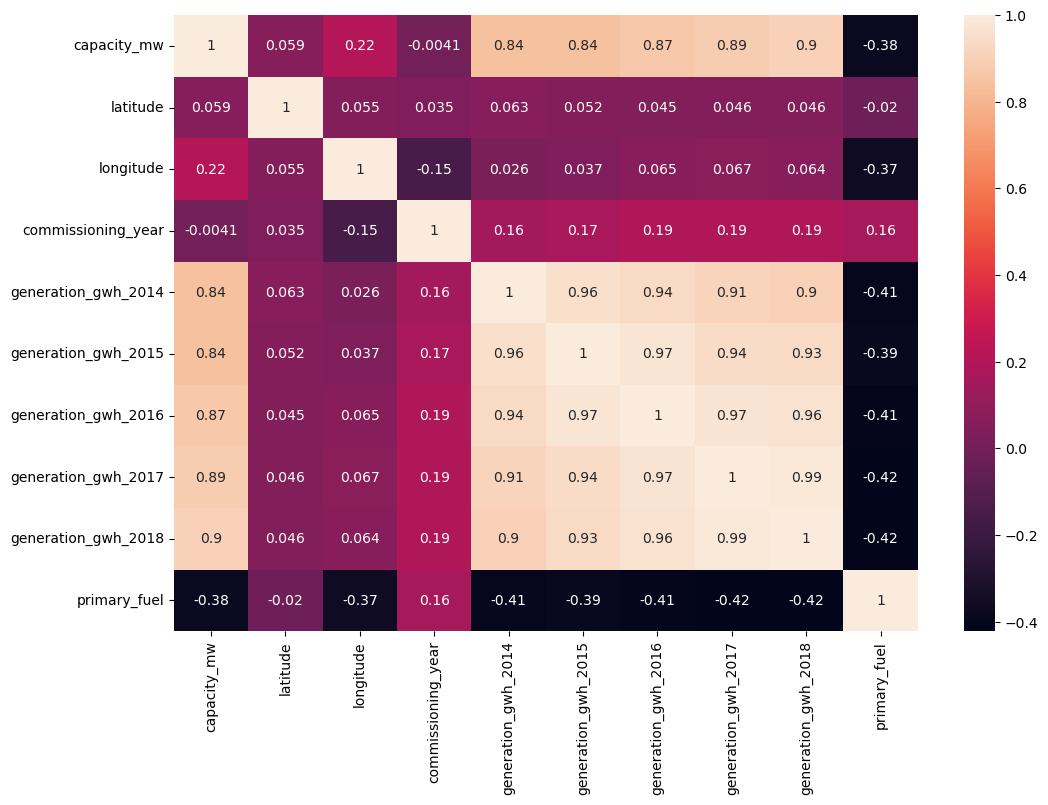

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),annot=True)

In [137]:
# mostly independent features are low correlated with target variable
# generation columns are good negatively correlated with target variable
# Although some multicolinearity between independent variables are there
df.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Biomass            NaN
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Solar              NaN
Wind               NaN
Name: generation_gwh_2014, dtype: float64

In [138]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,2015.0,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,2015.0,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [139]:
df[df['primary_fuel']=='Solar'].index

Int64Index([  0,  25,  26,  28,  32,  33,  34,  35,  36,  37,
            ...
            771, 779, 827, 829, 832, 835, 887, 894, 895, 903],
           dtype='int64', length=127)

In [140]:
df.drop(df[df['primary_fuel']=='Solar'].index, inplace = True)
df.drop(df[df['primary_fuel']=='Wind'].index, inplace = True)
df.drop(df[df['primary_fuel']=='Biomass'].index, inplace = True)
df.shape

(607, 10)

In [141]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
generation_gwh_2014    209
generation_gwh_2015    185
generation_gwh_2016    173
generation_gwh_2017    167
generation_gwh_2018    159
dtype: int64

In [142]:
# Now, will fill missing values in generation column group by average of fuel type
df.groupby('primary_fuel')['generation_gwh_2014'].mean()

primary_fuel
Coal       4737.279310
Gas         756.601441
Hydro       780.429852
Nuclear    4867.556164
Oil         130.881366
Name: generation_gwh_2014, dtype: float64

In [143]:
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2014'].fillna(4737.279310),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2014'].fillna(7756.601441),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2014'].fillna(780.429852),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2014'].fillna(4867.556164),df['generation_gwh_2014']  )
df['generation_gwh_2014']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2014'].fillna(130.881366),df['generation_gwh_2014']  )
df.groupby('primary_fuel')['generation_gwh_2015'].mean()

primary_fuel
Coal       4649.585751
Gas         840.159648
Hydro       709.991238
Nuclear    4234.875000
Oil          21.710086
Name: generation_gwh_2015, dtype: float64

In [144]:
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2015'].fillna(4649.585751),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2015'].fillna(840.159648),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2015'].fillna(709.991238),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2015'].fillna(4234.875000),df['generation_gwh_2015']  )
df['generation_gwh_2015']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2015'].fillna(21.710086),df['generation_gwh_2015']  )
df.groupby('primary_fuel')['generation_gwh_2016'].mean()

primary_fuel
Coal       4761.233946
Gas         826.305503
Hydro       699.318079
Nuclear    4272.608750
Oil           4.796871
Name: generation_gwh_2016, dtype: float64

In [145]:
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2016'].fillna(4761.233946),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2016'].fillna(826.305503),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2016'].fillna(699.318079),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2016'].fillna(4272.608750),df['generation_gwh_2016']  )
df['generation_gwh_2016']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2016'].fillna(4.796871),df['generation_gwh_2016']  )
df.groupby('primary_fuel')['generation_gwh_2017'].mean()

primary_fuel
Coal       4870.537285
Gas         881.216187
Hydro       693.884741
Nuclear    4323.415000
Oil           0.167471
Name: generation_gwh_2017, dtype: float64

In [146]:
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2017'].fillna(4870.537285),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2017'].fillna(881.216187),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2017'].fillna(693.884741),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2017'].fillna(4323.415000),df['generation_gwh_2017']  )
df['generation_gwh_2017']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2017'].fillna(0.167471),df['generation_gwh_2017']  )
df.groupby('primary_fuel')['generation_gwh_2018'].mean()

primary_fuel
Coal       5036.420635
Gas         846.658418
Hydro       737.636455
Nuclear    4277.031250
Oil           0.295215
Name: generation_gwh_2018, dtype: float64

In [147]:
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Coal',df['generation_gwh_2018'].fillna(5036.420635),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Gas',df['generation_gwh_2018'].fillna(846.658418),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Hydro',df['generation_gwh_2018'].fillna(737.636455),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Nuclear',df['generation_gwh_2018'].fillna(4277.031250),df['generation_gwh_2018']  )
df['generation_gwh_2018']=np.where(df['primary_fuel']=='Oil',df['generation_gwh_2018'].fillna(0.295215),df['generation_gwh_2018']  )
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [148]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,Coal,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150


In [149]:
#Seprate independent and dependet features
X= df.drop('primary_fuel',axis=1)
Y = df['primary_fuel']

In [150]:
X.shape , Y.shape

((607, 9), (607,))

In [151]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150


In [152]:
X.skew()

capacity_mw            2.523310
latitude              -0.058579
longitude              0.986666
commissioning_year    -1.198052
generation_gwh_2014    3.078832
generation_gwh_2015    3.826520
generation_gwh_2016    3.622211
generation_gwh_2017    3.673231
generation_gwh_2018    3.559440
dtype: float64

In [153]:
num= df.select_dtypes(np.number)

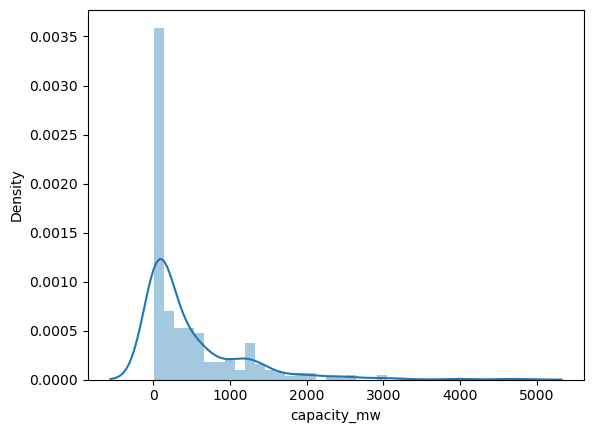

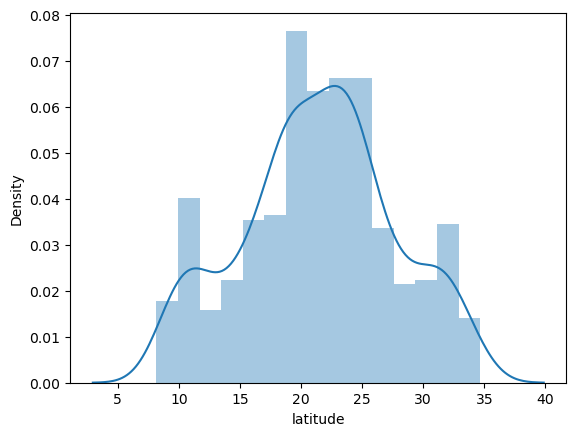

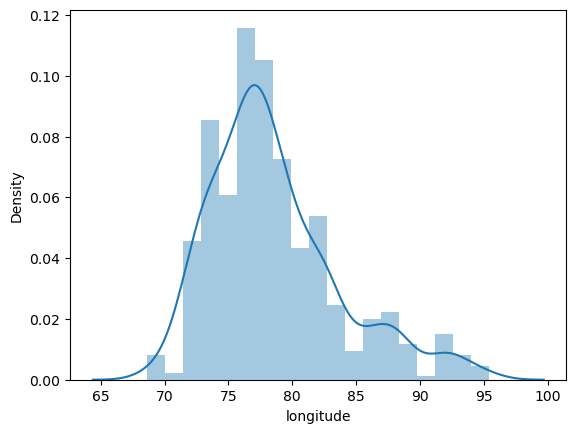

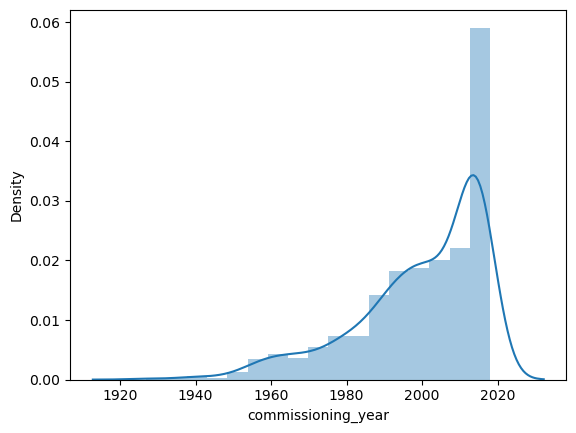

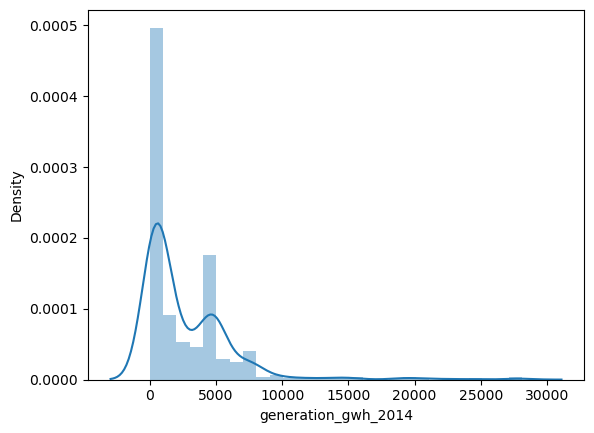

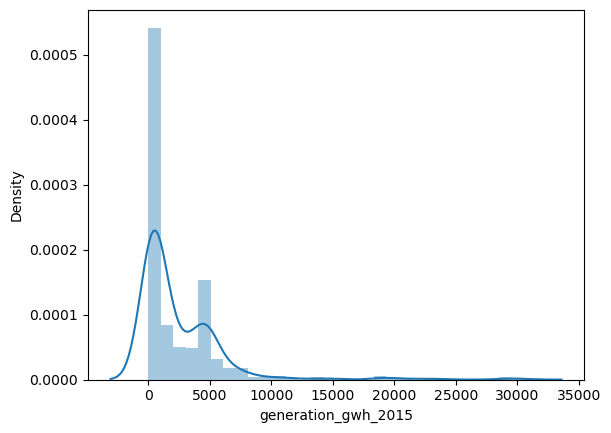

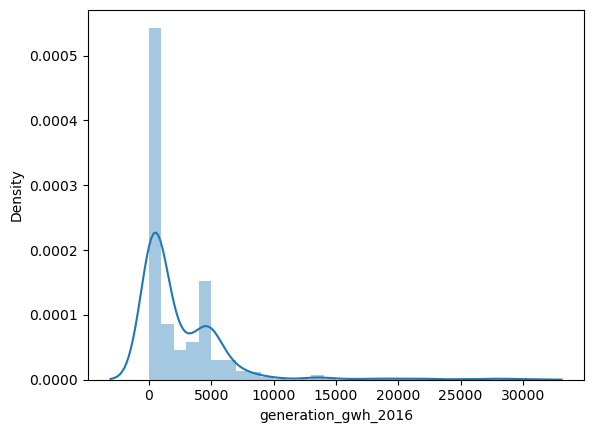

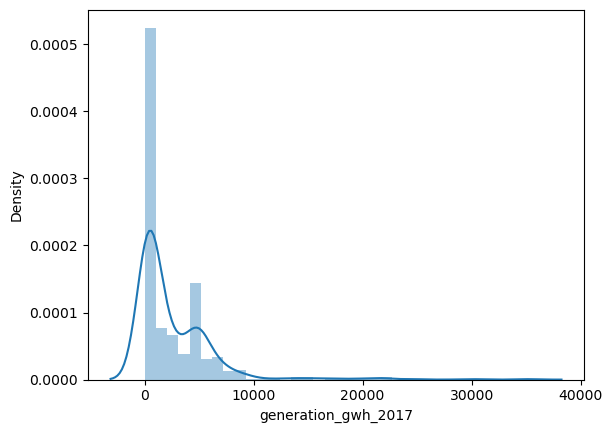

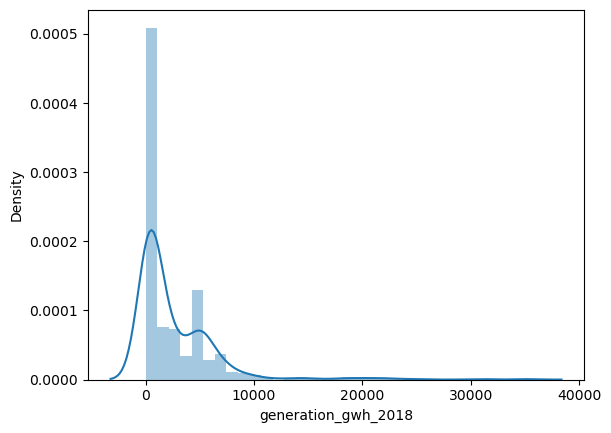

In [154]:
# We will not handle outliers on longitude because those are locations
# Commissioning year is categorical data
for i in X.columns:
    sns.distplot(X[i])
    plt.show()

In [155]:
col=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for i in col:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    upper= (X[i].quantile(.75) +(1.5* IQR))
    X[i]=np.where(X[i]>upper,upper,X[i])
    

In [156]:
X.skew()

capacity_mw            1.109633
latitude              -0.058579
longitude              0.986666
commissioning_year    -1.198052
generation_gwh_2014    1.282673
generation_gwh_2015    1.518384
generation_gwh_2016    1.476022
generation_gwh_2017    1.409096
generation_gwh_2018    1.454508
dtype: float64

In [157]:
v=X.copy()
v['Total']=X['generation_gwh_2014']+X['generation_gwh_2015']+X['generation_gwh_2016']+X['generation_gwh_2017']+X['generation_gwh_2018']
v.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)
v

,capacity_mw,latitude,longitude,commissioning_year,Total
1,98.0,24.7663,74.6090,2015.0,24055.056927
3,135.0,23.8712,91.3602,2004.0,3637.554320
4,1453.5,21.9603,82.4091,2015.0,27859.499736
5,250.0,23.7689,68.6447,2005.0,5662.606000
6,60.0,10.4547,77.0078,1970.0,509.131550
...,...,...,...,...,...
893,62.4,30.3033,77.5684,1991.0,984.064550
899,600.0,30.1081,77.3257,2007.0,16223.198930
901,106.6,13.1156,77.5838,1993.0,0.167471
902,1453.5,16.2949,77.3568,2016.0,6523.770835


In [158]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
scaled

array([[-0.6584317 ,  0.53608541, -0.77608434,  0.91147876,  0.96271486],
       [-0.58105619,  0.39288959,  2.50590045,  0.26575529, -0.62323304],
       [ 2.17623053,  0.08718866,  0.75215301,  0.91147876,  1.25822839],
       ...,
       [-0.64044712, -1.32776397, -0.1932456 , -0.37996817, -0.90577034],
       [ 2.17623053, -0.81914763, -0.23772065,  0.97018089, -0.39904358],
       [-0.69607384,  0.4694868 , -0.94483485,  0.91147876,  0.96271486]])

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= pd.DataFrame()
VIF['features']=v.columns

In [242]:
VIF= pd.DataFrame()
VIF['features']= v.columns
VIF['vif']= [variance_inflation_factor(v.values,i) for i in range(len(v.columns))]

In [244]:
VIF

,features,vif
0,capacity_mw,3.123341
1,latitude,13.156510
2,longitude,245.617974
3,commissioning_year,240.033005
4,Total,3.242785


In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
 
#Transformation
from sklearn.preprocessing import power_transform
transformed=power_transform(scaled)

In [162]:
inp=pd.DataFrame(transformed, columns=v.columns)

In [163]:
X= scaled

In [164]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [220]:
x,y=sm.fit_resample(X,Y)

In [166]:
X.shape , Y.shape

((607, 5), (607,))

In [167]:
print(inp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         607 non-null    float64
 1   latitude            607 non-null    float64
 2   longitude           607 non-null    float64
 3   commissioning_year  607 non-null    float64
 4   Total               607 non-null    float64
dtypes: float64(5)
memory usage: 23.8 KB
None


In [168]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
inp = imputer.fit_transform(inp)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [170]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.8360655737704918 on Random State = 107


In [171]:
# Random State =74
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=74,test_size=.20)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [173]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.8688524590164
Confusion Matrix of  LogisticRegression()  is 
 [[50  0  6  0  0]
 [ 2  2  9  0  0]
 [ 4  0 43  0  0]
 [ 0  0  1  0  0]
 [ 0  0  5  0  0]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       1.00      0.15      0.27        13
           2       0.67      0.91      0.77        47
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5

    accuracy                           0.78       122
   macro avg       0.51      0.39      0.39       122
weighted avg       0.78      0.78      0.74       122

**************************************************
Accuracy_Score of  RidgeClassifier() is 77.04918032786885
Confusion Matrix of  RidgeClassifier()  is 
 [[49  0  7  0  0]
 [ 1  1 11  0  0]
 [ 3  0 44  0  0]
 [ 0  0  1  0  0]
 [ 0  0  5  0  0]]
              precision    recall  f1-score   support

           0

In [174]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 77.8688524590164
cross Validation accuracy score of  LogisticRegression()  is  73.30849478390462
**************************************************
Accuracy_Score of  RidgeClassifier() is 77.04918032786885
cross Validation accuracy score of  RidgeClassifier()  is  73.63636363636363
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 86.0655737704918
cross Validation accuracy score of  DecisionTreeClassifier()  is  79.90380707221243
**************************************************
Accuracy_Score of  SVC() is 82.78688524590164
cross Validation accuracy score of  SVC()  is  77.43124237908144
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 84.42622950819673
cross Validation accuracy score of  KNeighborsClassifier()  is  82.70288578783364
**************************************************
Accuracy_Score of  RandomForestClassifier() is 87.70491803278688
c

In [175]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
         "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
         "min_child_weight" : [ 1, 3, 5, 7 ],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [176]:
GCV= RandomizedSearchCV(XGB_model,param_distributions=params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy')

In [177]:
GCV.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [178]:
GCV.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [179]:
xgb_predict=GCV.best_estimator_.predict(x_test)
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        56
           1       0.83      0.38      0.53        13
           2       0.84      0.89      0.87        47
           3       0.00      0.00      0.00         1
           4       1.00      0.60      0.75         5

    accuracy                           0.86       122
   macro avg       0.71      0.57      0.61       122
weighted avg       0.85      0.86      0.84       122



In [180]:
confusion_matrix(y_test,xgb_predict)

array([[55,  0,  1,  0,  0],
       [ 4,  5,  4,  0,  0],
       [ 4,  1, 42,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  2,  0,  3]], dtype=int64)

<Axes: >

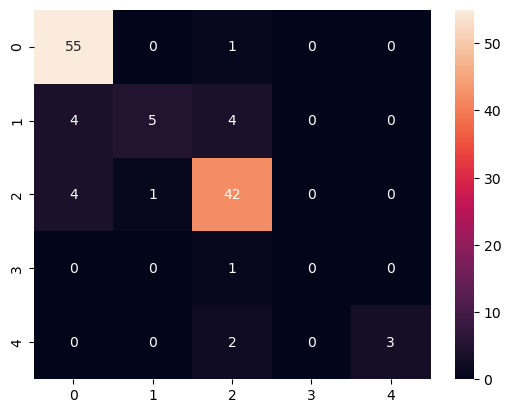

In [181]:
sns.heatmap(confusion_matrix(y_test,xgb_predict),annot=True,fmt='d')

In [215]:
accuracy_score(y_test,xgb_predic)*100

86.0655737704918

In [250]:
y_pred_prob = y_test,xgb_predict

In [186]:
import joblib
joblib.dump(GCV.best_estimator_,'Global_Power_Fuel_prediction.pkl')

['Global_Power_Fuel_prediction.pkl']

In [187]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
1,98.0,24.7663,74.6090,Coal,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,Coal,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150


In [188]:
data=df.copy()

In [189]:
data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [190]:
data['Total']=df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018']

data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Total
1,98.0,24.7663,74.6090,Coal,2015.0,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,24055.056927
3,135.0,23.8712,91.3602,Gas,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128,3637.554320
4,1800.0,21.9603,82.4091,Coal,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,27859.499736
5,250.0,23.7689,68.6447,Coal,2005.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,5662.606000
6,60.0,10.4547,77.0078,Hydro,1970.0,157.558250,152.195200,61.421350,89.629600,48.327150,509.131550
...,...,...,...,...,...,...,...,...,...,...,...
893,62.4,30.3033,77.5684,Hydro,1991.0,184.453100,183.000000,204.253600,175.866250,236.491600,984.064550
899,600.0,30.1081,77.3257,Coal,2007.0,3194.359820,3709.552200,3123.572061,3156.053669,3039.661180,16223.198930
901,106.6,13.1156,77.5838,Oil,1993.0,0.000000,0.000000,0.000000,0.167471,0.000000,0.167471
902,1600.0,16.2949,77.3568,Coal,2016.0,4737.279310,0.994875,233.596650,865.400000,686.500000,6523.770835


In [191]:
data.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,Total
1,98.0,24.7663,74.6090,Coal,2015.0,24055.056927
3,135.0,23.8712,91.3602,Gas,2004.0,3637.554320
4,1800.0,21.9603,82.4091,Coal,2015.0,27859.499736
5,250.0,23.7689,68.6447,Coal,2005.0,5662.606000
6,60.0,10.4547,77.0078,Hydro,1970.0,509.131550


<Axes: >

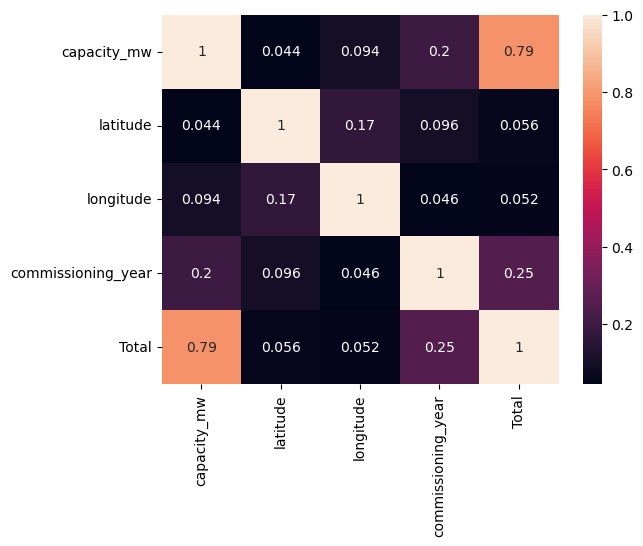

In [192]:
sns.heatmap(data.corr(),annot=True)

In [262]:
randomCV =RandomizedSearchCV(RFR_model,param_distributions=random_grid,cv=5,random_state=100,verbose=2,n_jobs=-1)
randomCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [263]:
randomCV.best_estimator_

RandomForestRegressor(max_depth=64, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=600)

In [264]:
randomCV.best_params_

{'n_estimators': 600,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 64}

In [265]:
random_predict=randomCV.best_estimator_.predict(x_test)
print('mean_square_error of GrieSearchCV model' , mean_squared_error(y_test,random_predict))
print('R2 Score of Grid Search CV model', r2_score(y_test,random_predict )*100)

mean_square_error of GrieSearchCV model 0.2654096561190479
R2 Score of Grid Search CV model 78.62360756668882


In [266]:
# Root mean Square Error  is:

np.sqrt(mean_squared_error(y_test,random_predict))

0.5151792465919487

In [267]:
import joblib
joblib.dump(randomCV.best_estimator_,'Global_Power_capacity_prediction.pkl')

['Global_Power_capacity_prediction.pkl']